# Proyek Analisis Data: [bike-sharing]
- **Nama:** [Dimas Abian Ihsan]
- **Email:** [dimasabian01@gmail.com]
- **ID Dicoding:** [galahad20]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh perubahan musim terhadap jumlah orang yang registered dan casual pada sistem penyewaan pada tahun 2011 dan 2012
- Bagaimana pengaruh kecepatan angin terhadap frekuensi penyewaan sepeda?
- Bagaimana tren penyewaan sepeda pada musim panas di tahun 2011 dan 2012?
- Bagaimana perbandingan dari musim dengan penyewaan sepeda tertinggi dan terendah? Faktor apa saja yang mempengaruhinya?


## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy

Import libraries yang diperlukan untuk proses analisis data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data



Menghubungkan berkas notebook dengan google drive tempat penyimpanan file .csv

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Definisikan dataframe dari file day.csv dan hour.csv

Panggil head atau 5 data teratas dari dataframe df_hari yang telah dibuat, memastikan tidak adanya error

In [6]:
df_hari = pd.read_csv("/content/gdrive/MyDrive/day.csv", delimiter=",")
df_jam = pd.read_csv("/content/gdrive/MyDrive/hour.csv", delimiter=",")
df_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Begitu juga dengan dataframe dari file hour.csv, panggil 5 data teratas untuk memastikan tidak adanya error

In [7]:
df_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada proses gathering data diperoleh 2 buah dataframe yang berasal dari masing-masing file csv.
- Df_day merupakan dataframe yang diperoleh dari file .csv yang berisi data peminjaman sepeda per **hari** dari tahun 2011-2012.
- Df_hour merupakan dataframe yang diperoleh dari file .csv yang berisi data peminjaman sepeda per **jam** dari tahun 2011-2012.
- Dari 2 buah dataframe yang telah dibuat akan digunakan lebih lanjut untuk proses penilaian data.

### Assessing Data

Selanjutnya masuk ke dalam proses menilai data. Proses ini diperlukan untuk memastikan agar data yang digunakan berkualitas

Tahapan dalam proses assessing data:
1. Memeriksa tipe data dari setiap kolom sesuai dengan keterangan
2. Mendeteksi adanya nilai null/kosong pada data yang dimiliki
3. Mendeteksi adanya duplikasi data
4. Menampilkan persebaran data pada dataframe df_hari dan df_jam dan mencari modus
5. Menentukan dan menampilkan skewness dari dataframe df_hari dan df_jam
6. Memeriksa adanya outlier pada dataframe df_hari dan df_jam


Tahap assesing data dimulai dengan menampilkan informasi dari kolom berupa tipe data yang digunakan,

####**Menampilkan tipe data dari df_hari**

In [8]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari tipe data yang telah ditampilkan, saya memperoleh informasi bahwa kolom instant kurang berguna sebab dalam dataframe sendiri sudah memiliki index yang mewakili penomoran data tersebut. Sehingga nantinya kolom instant akan dihapus pada proses data cleaning.

Pada kolom dteday menggunakan tipe data object yang kurang sesuai untuk merepresentasikan kolom dteday

Untuk kolom dteday, yr, mnth, temp, hum, weather, dan cnt akan saya ubah keterangannya sehingga saat membaca data tersebut akan langsung mengetahui label ini merepresentasikan kumpulan nilai di bawahnya.

#### **Menampilkan tipe data dari df_jam**

In [9]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tipe data df_jam hanya memiliki perbedaan pada hr yang mewakili hour. Kolom instant pada dataframe ini akan dihapus karena alasan yang sama dengan df_hari

Pada kolom dteday menggunakan tipe data object yang kurang sesuai untuk merepresentasikan kolom dteday

Untuk kolom yr, mnth, hr, temp, hum, dan cnt akan saya ubah keterangannya sehingga saat membaca data tersebut akan langsung paham bahwa ini merupakan kolom yang mewakili nilai tersebut.

#### **Mendeteksi adanya nilai kosong pada 2 dataframe**

In [10]:
df_hari.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari operasi yang telah dilakukan di atas diperoleh bahwa dalam dataframe **TIDAK** ada data yang bernilai kosong.

In [11]:
df_jam.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dari operasi yang telah dilakukan di atas diperoleh bahwa dalam dataframe **TIDAK** ada data yang bernilai kosong.

#### **Mendeteksi adanya duplikasi data**

In [12]:
df_hari.duplicated().sum()

0

In [13]:
df_jam.duplicated().sum()

0

Dari 2 dataframe diketahui bahwa tidak terdapat data yang terduplikasi

#### **Menampilkan persebaran data pada 2 buah dataframe**

In [14]:
df_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
df_hari_mode = stats.mode(df_hari['cnt'])
print(f"Nilai modus penyewaan sepeda pada satu hari dalam data df_hari adalah {df_hari_mode[0]}")

Nilai modus penyewaan sepeda pada satu hari dalam data df_hari adalah 1096


**Dari persebaran data ini akan fokus pada jumlah orang yang menggunakan jasa penyewaan sepeda**. Dilanjutkan dengan mencari nilai skewness dari dataframe df_hari


#### **Mencari nilai skewness dari dataframe df_hari**

Nilai dari skewness pada df_hari adalah sebesar -0.04735278011900183


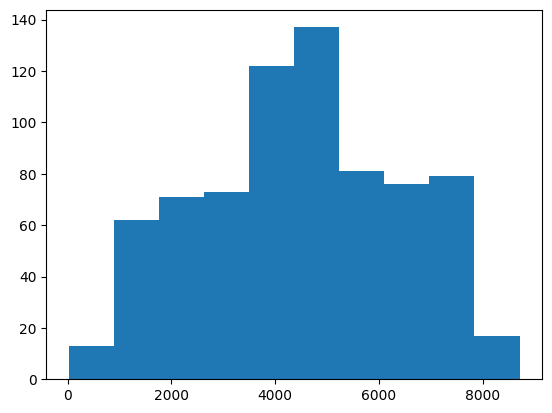

In [16]:
df_hari_series = pd.Series(df_hari['cnt'])
print(f"Nilai dari skewness pada df_hari adalah sebesar {df_hari_series.skew()}")
plt.hist(df_hari_series)
plt.show()

Tingkat skewness yang diperoleh menunjukkan bahwa persebaran data pada dataframe df_hari cenderung **left-skewed**. Yaitu sebagian besar populasi (modus) berada di sebelah kanan dan nilai mean lebih kecil dari nilai median

In [17]:
df_jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
df_jam_mode = stats.mode(df_jam['cnt'])
print(f"Nilai modus penyewaan sepeda pada satu jam di dataframe df_jam adalah {df_jam_mode[0]}")

Nilai modus penyewaan sepeda pada satu jam di dataframe df_jam adalah 5


Dari persebaran data ini akan fokus pada jumlah orang yang menggunakan jasa penyewaan sepeda.

#### Dilanjutkan dengan mencari **nilai skewness** dari dataframe df_jam

Nilai dari skewness pada df_jam adalah sebesar 1.2774116037490577


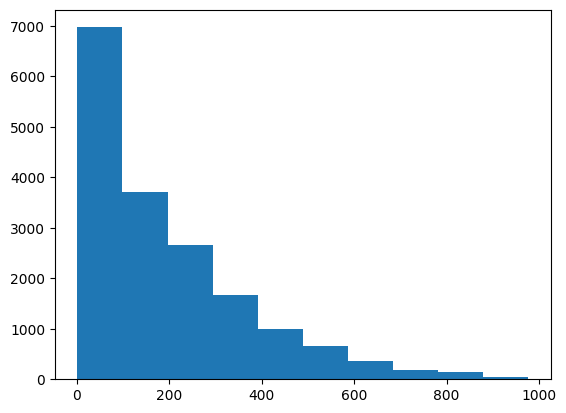

In [19]:
df_jam_series = pd.Series(df_jam['cnt'])
print(f"Nilai dari skewness pada df_jam adalah sebesar {df_jam_series.skew()}")
plt.hist(df_jam_series)
plt.show()

Tingkat skewness yang diperoleh menunjukkan bahwa persebaran data pada dataframe df_hari cenderung **right-skewed**. Yaitu sebagian besar populasi (modus) berada di sebelah kiri dan nilai mean lebih besar dari nilai median.

#### **Memeriksa adanya outlier pada df_hari**

Pemeriksaan terhadap outlier dengan menggunakan IQR method

In [20]:
q25, q75 = np.percentile(df_hari['cnt'], 25), np.percentile(df_hari['cnt'],75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in  df_hari['cnt'] if x < minimum or x > maximum]
print(f"Jumlah outlier pada df_hari adalah {len(outliers)}")

Jumlah outlier pada df_hari adalah 0


#### **Memeriksa adannya outlier pada df_jam**

In [21]:
q25, q75 = np.percentile(df_jam['cnt'],25), np.percentile(df_jam['cnt'],75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers = [x for x in  df_jam['cnt']if x < minimum or x > maximum]
print(f"Jumlah outlier pada df_jam adalah {len(outliers)}")

Jumlah outlier pada df_jam adalah 505


**Insight:**
- Dari proses assessing data diperoleh informasi berupa tidak adanya data yang kosong dan terduplikasi
- Nilai modus penyewaan sepeda pada satu hari dalam data df_hari adalah 1096
- Nilai modus penyewaan sepeda pada satu jam dalam data df_jam adalah 5
- Dari deteksi outlier pada df_hari diperoleh bahwa tidak ada outlier namun dalam df_jam terdapat 505 outlier yang saya yakin merupakan error

### Cleaning Data

#### **DEFINE**

Proses Cleaning Data pada 2 buah dataframe sebagai berikut:


1. Menghapus kolom yang tidak diperlukan
2. Mengganti nama kolom agar lebih mudah dipahami.
3. Menyeseuaikan tipe data yang digunakan untuk tanggal pada df_hari dan df_jam

####**CODE & TEST**

#####Dimulai dengan menghapus kolom instant pada df_hari dan df_jam

Kolom instant kurang berguna sebab dalam dataframe sendiri sudah memiliki index yang mewakili penomoran data tersebut.

In [22]:
df_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
df_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
grupDF = [df_hari, df_jam]
for i in grupDF:
    i.drop(labels='instant', axis=1, inplace=True)

df_hari.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
df_jam.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Mengganti nama kolom pada df_hari dan df_jam agar lebih mudah dipahami

Untuk kolom dteday, yr, mnth, temp, hum, weather, dan cnt akan saya ubah keterangannya sehingga saat membaca data tersebut akan langsung mengetahui label ini merepresentasikan kumpulan nilai di bawahnya.

##### Mengganti nama pada data season karena perlu diperjelas dimulai oleh musim apa pada dataset ini

In [26]:
grupDF = [df_hari, df_jam]
for i in grupDF:
  i.rename(columns={
      'dteday': 'date',
      'yr': 'year',
      'mnth': 'month',
      'temp': 'temperature',
      'hum': 'humidity',
      'cnt': 'count'
  }, inplace = True)

In [27]:
df_hari.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
df_jam.head()

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Mengganti nama pada data season karena perlu diperjelas dimulai oleh musim apa pada dataset ini

In [29]:
df_hari['season'] = df_hari['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [30]:
df_jam['season'] = df_jam['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

Mengganti nama pada data year agar lebih jelas tahun ke berapa

In [31]:
df_hari['year'] = df_hari['year'].map({
    0: '2011',
    1: '2012'
})

In [32]:
df_jam['year'] = df_jam['year'].map({
    0: '2011',
    1: '2012'
})

Mengganti nama pada data month agar lebih jelas

In [33]:
df_hari['month'] = df_hari['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

In [34]:
df_jam['month'] = df_jam['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

#####Mengganti nama pada data weekday agar lebih mudah dipahami

In [35]:
df_hari['weekday'] = df_hari['weekday'].map({
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
})

In [36]:
df_jam['weekday'] = df_jam['weekday'].map({
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
})

Mengganti angka pada data yang digunakan pada weathersit agar jelas maksud dari data yang dimuat dalam label tersebut.

In [37]:
df_hari['weathersit'] = df_hari['weathersit'].map({
    1: 'Clear / Few clouds',
    2: 'Mist / Cloudy',
    3: 'Light rain / Light snow',
    4: 'Heavy rain / Heavy snow'
})

In [38]:
df_jam['weathersit'] = df_jam['weathersit'].map({
    1: 'Clear / Few clouds',
    2: 'Mist / Cloudy',
    3: 'Light rain / Light snow',
    4: 'Heavy rain / Heavy snow'
})

In [39]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         731 non-null    object 
 1   season       731 non-null    object 
 2   year         731 non-null    object 
 3   month        731 non-null    object 
 4   holiday      731 non-null    int64  
 5   weekday      731 non-null    object 
 6   workingday   731 non-null    int64  
 7   weathersit   731 non-null    object 
 8   temperature  731 non-null    float64
 9   atemp        731 non-null    float64
 10  humidity     731 non-null    float64
 11  windspeed    731 non-null    float64
 12  casual       731 non-null    int64  
 13  registered   731 non-null    int64  
 14  count        731 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 85.8+ KB


Menampilkan dataframe setelah proses mapping

In [40]:
df_hari.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,January,0,saturday,0,Mist / Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,January,0,sunday,0,Mist / Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,January,0,monday,1,Clear / Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,January,0,tuesday,1,Clear / Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,January,0,wednesday,1,Clear / Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
df_jam.head()

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,January,0,0,saturday,0,Clear / Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,January,1,0,saturday,0,Clear / Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,January,2,0,saturday,0,Clear / Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,January,3,0,saturday,0,Clear / Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,January,4,0,saturday,0,Clear / Few clouds,0.24,0.2879,0.75,0.0,0,1,1


##### Menyeseuaikan tipe data yang digunakan untuk tanggal pada df_hari dan df_jam

In [42]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         731 non-null    object 
 1   season       731 non-null    object 
 2   year         731 non-null    object 
 3   month        731 non-null    object 
 4   holiday      731 non-null    int64  
 5   weekday      731 non-null    object 
 6   workingday   731 non-null    int64  
 7   weathersit   731 non-null    object 
 8   temperature  731 non-null    float64
 9   atemp        731 non-null    float64
 10  humidity     731 non-null    float64
 11  windspeed    731 non-null    float64
 12  casual       731 non-null    int64  
 13  registered   731 non-null    int64  
 14  count        731 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 85.8+ KB


In [43]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         17379 non-null  object 
 1   season       17379 non-null  object 
 2   year         17379 non-null  object 
 3   month        17379 non-null  object 
 4   hr           17379 non-null  int64  
 5   holiday      17379 non-null  int64  
 6   weekday      17379 non-null  object 
 7   workingday   17379 non-null  int64  
 8   weathersit   17379 non-null  object 
 9   temperature  17379 non-null  float64
 10  atemp        17379 non-null  float64
 11  humidity     17379 non-null  float64
 12  windspeed    17379 non-null  float64
 13  casual       17379 non-null  int64  
 14  registered   17379 non-null  int64  
 15  count        17379 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 2.1+ MB


Tipe data untuk kolom date pada kedua dataframe berupa object. Ini belum sesuai untuk data yang digunakan untuk menyimpan data berupa tanggal. Maka akan saya ubah ke datetime

In [44]:
grupDF = [df_hari, df_jam]
for i in grupDF:
  i['date'] = pd.to_datetime(i['date'])

Setelah diubah langsung cek tipe data pada df_hari dan df_jam

In [45]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   season       731 non-null    object        
 2   year         731 non-null    object        
 3   month        731 non-null    object        
 4   holiday      731 non-null    int64         
 5   weekday      731 non-null    object        
 6   workingday   731 non-null    int64         
 7   weathersit   731 non-null    object        
 8   temperature  731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  humidity     731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  count        731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
mem

In [46]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17379 non-null  datetime64[ns]
 1   season       17379 non-null  object        
 2   year         17379 non-null  object        
 3   month        17379 non-null  object        
 4   hr           17379 non-null  int64         
 5   holiday      17379 non-null  int64         
 6   weekday      17379 non-null  object        
 7   workingday   17379 non-null  int64         
 8   weathersit   17379 non-null  object        
 9   temperature  17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  humidity     17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  count        17379 non-null  int64         
dtypes: d

**Insight:**
- Dari proses cleaning data yang dilakukan terhadap kolom instant karena pada dataframe sudah memiliki index yang mewakili penomoran data tersebut.
- Proses selanjutnya mengganti nama kolom agar lebih jelas bahwa kumpulan nilai di bawahnya ini merupakan data untuk label tersebut.
- Terakhir tipe data untuk date diubah dari object menjadi datetime


## Exploratory Data Analysis (EDA)

### Explore ...

#####Mendeskripsikan tiap dataframe

In [47]:
df_hari.describe(include = "all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,January,NaN,saturday,NaN,Clear / Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [48]:
df_jam.describe(include = "all")

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012,May,NaN,NaN,saturday,NaN,Clear / Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#####Menampilkan tabel korelasi antar fitur pada df_hari

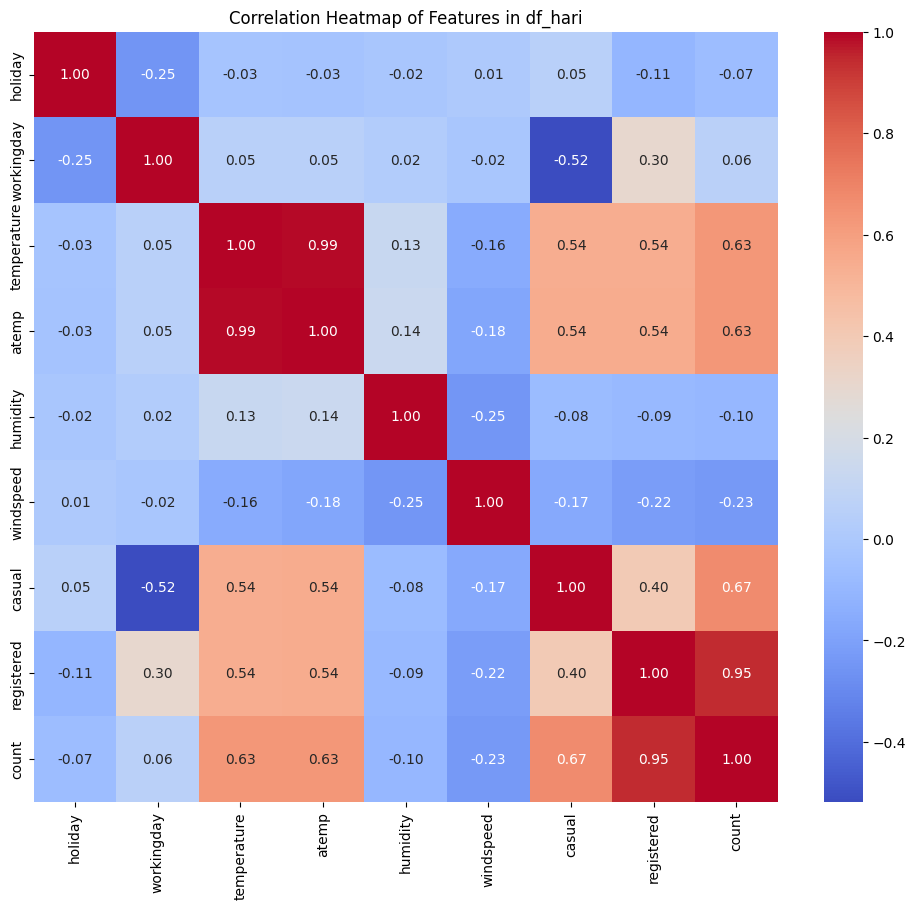

In [49]:
#correlation heatmap on numerical features

numerical_features = df_hari.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features in df_hari')
plt.show()

Dari tabel di atas menunjukkan korelasi antar fitur yang dimiliki oleh df_hari

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda berdasarkan TAHUN dengan df_hari

In [50]:
df_hari.groupby(by='year').agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                              registered                    \
        max min         mean         std        max  min         mean   
year                                                                    
2011   3065   9   677.402740  556.269121       4614  416  2728.358904   
2012   3410   2  1018.483607  758.989897       6946   20  4581.450820   

                  count                                 
              std   max  min         mean          std  
year                                                    
2011  1060.110413  6043  431  3405.761644  1378.753666  
2012  1424.331846  8714   22  5599.934426  1788.667868

Berdasarkan tahun diperoleh bahwa **rata-rata** **jumlah pengguna casual per hari pada tahun 2011**  **jauh lebih sedikit** dari jumlah pengguna registered.

**Pada tahun 2012 rata-rata penyewa sepeda baik casual dan registered per harinya** mengalami **peningkatan**. Hal ini menunjukkan bahwa **bisnis ini berkembang tiap tahunnya**

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda berdasarkan TAHUN dengan df_jam

In [51]:
df_jam.groupby(by='year').agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                           registered                              \
        max min       mean        std        max min        mean         std   
year                                                                           
2011    272   0  28.600578  38.840789        567   0  115.193869  109.461014   
2012    367   0  42.679757  56.970413        886   0  191.986604  175.481637   

     count                              
       max min        mean         std  
year                                    
2011   651   1  143.794448  133.797854  
2012   977   1  234.666361  208.910941

Dari tabel di atas diperoleh bahwa rata-rata penyewa sepeda pada tahun 2011 baik casual dan registered mengalami peningkatan pada tahun 2012

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda bedasarkan MUSIM dengan df_hari

In [52]:
df_hari.groupby(['season']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
fall     3160  118  1202.611702  595.975032       6917  889  4441.691489   
spring   3155    9   334.928177  387.655561       5315  416  2269.204420   
summer   3410  120  1106.097826  737.590829       6456  674  3886.233696   
winter   3031    2   729.112360  606.318118       6946   20  3999.050562   

                    count                                  
                std   max   min         mean          std  
season                                                     
fall    1304.626949  8714  1115  5644.303191  1459.800381  
spring  1200.269751  7836   431  2604.132597  1399.942119  
summer  1353.375628  8362   795  4992.331522  1695.977235  
winter  1444.782557  8555    22  4728.162921  1699.615261

In [53]:
df_hari.groupby(['season', 'year']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                               registered        \
               max  min         mean         std        max   min   
season year                                                         
fall   2011   3065  118  1015.425532  554.916801       4614   889   
       2012   3160  371  1389.797872  579.161622       6917  3195   
spring 2011   1424    9   238.055556  252.609365       2841   416   
       2012   3155    9   430.736264  467.745345       5315   432   
summer 2011   2355  121   843.086957  520.552109       4414   674   
       2012   3410  120  1369.108696  826.568007       6456   907   
winter 2011   2397   50   593.404494  504.441967       4372   570   
       2012   3031    2   864.820225  669.109356       6946    20   

                                      count                                  
                    mean          std   max   min         mean          std  
season year                                                                  
fall   2011  3448.936170   677.857596  6043  1115  4464.361702   798.348077  
       2012  5434.446809   985.186535  8714  4073  6824.244681   912.756191  
spring 2011  1428.611111   497.286269  3239   431  1666.666667   614.012663  
       2012  3100.560440  1109.648415  7836   441  3531.296703  1341.203270  
summer 2011  2932.086957   906.775638  5805   795  3775.173913  1138.901028  
       2012  4840.380435  1010.116910  8362  1027  6209.489130  1221.345569  
winter 2011  3071.056180   786.175110  5511   627  3664.460674   983.006128  
       2012  4927.044944  1355.921499  8555    22  5791.865169  1598.520901

Dari tabel di atas diperoleh bahwa :

Pada tahun 2011 di season **fall** merupakan **jumlah rata-rata penyewa sepeda terbanyak pada tahun 2011** lalu diikuti oleh musim summer, winter dan spring.
Sedangkan pada tahun 2011 di season **spring** merupakan musim dimana **rata-rata penyewa sepeda terendah pada tahun 2011**.

Pada tahun **2012** diperoleh bahwa season **fall menjadi musim dimana rata-rata penyewa sepeda terbanyak** lalu diikuti oleh musim summer, winter dan spring Sedangkan season **spring** menjadi musim dimana **rata-rata penyewa sepeda terendah.**

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda bedasarkan MUSIM dengan df_jam

In [54]:
df_jam.groupby(['season', 'year']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                           registered                  \
               max min       mean        std        max min        mean   
season year                                                               
fall   2011    248   0  42.611607  44.232354        567   0  144.732143   
       2012    350   0  57.908245  57.266553        886   1  226.435284   
spring 2011    175   0  10.360251  18.972679        393   0   62.173598   
       2012    367   0  18.029899  33.179753        681   1  129.784269   
summer 2011    240   0  35.208352  41.349968        555   0  122.447571   
       2012    361   0  57.097915  68.207981        782   0  201.865367   
winter 2011    272   0  24.748360  36.841381        553   1  128.080600   
       2012    362   0  36.686845  53.133483        876   0  209.011916   

                        count                              
                    std   max min        mean         std  
season year                                                
fall   2011  122.723841   651   1  187.343750  149.352219  
       2012  192.177436   977   2  284.343528  226.013549  
spring 2011   57.425355   405   1   72.533849   67.447952  
       2012  126.033290   801   1  147.814167  143.702976  
summer 2011  112.001579   638   1  157.655924  138.421632  
       2012  175.967925   957   1  258.963282  216.017955  
winter 2011  112.864306   625   1  152.828960  133.225077  
       2012  183.919820   967   1  245.698761  212.462838

Dari tabel di atas diperoleh bahwa:

Pada tahun **2011**, season **fall** menjadi musim dengan **rata-rata penyewa sepeda terbanyak** per jamnya

Pada tahun **2012**, season **fall** menjadi musim dengan **rata-rata penyewa sepeda terbanyak per** jamnya.

Pada tahun **2011 dan 2012**, setiap harinya setidaknya terdapat **SATU orang** penyewa sepeda **tiap jamnya**

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda berdasarkan BULAN dengan df_hari

In [55]:
df_hari.groupby(['month','year']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                               registered        \
                  max  min         mean         std        max   min   
month     year                                                         
April     2011   1965  121   744.866667  497.720787       3722   674   
          2012   3252  120  1281.866667  843.933922       5950   907   
August    2011   1914  226   930.387097  359.765449       4614   889   
          2012   2827  935  1393.451613  449.915462       6541  3341   
December  2011    706   50   272.516129  168.638048       3672   451   
          2012   1153    9   427.258065  244.896028       6055   432   
February  2011    694   47   222.928571  193.234827       2348   905   
          2012   1435   65   300.724138  262.347084       4546  1456   
January   2011    331    9    99.129032   72.503215       1844   416   
          2012   1070   67   289.322581  235.103295       4185  1234   
July      2011   3065  562  1175.870968  665.455420       4220  2298   
          2012   2562  747  1345.322581  519.993166       6790  3195   
June      2011   1920  513  1020.400000  458.669861       4488  2993   
          2012   2963  477  1443.133333  770.864527       6456  3594   
March     2011   1424   46   413.741935  332.841501       2355   491   
          2012   3155  203  1019.935484  701.334392       5893  2339   
May       2011   2355  255  1001.612903  525.722530       4238  2213   
          2012   3410  342  1426.935484  888.284562       6433  2501   
November  2011   1275   69   519.800000  374.552091       3891   935   
          2012   2290  123   700.300000  542.275166       5520  1470   
October   2011   2397   57   813.612903  617.780796       4267   570   
          2012   3031    2  1114.129032  759.714540       6911    20   
September 2011   2521  118   884.833333  599.444173       4372  1689   
          2012   3160  371  1459.266667  761.049273       6946  3197   

                                         count                                  
                       mean          std   max   min         mean          std  
month     year                                                                  
April     2011  2417.466667   809.575143  5312   795  3162.333333  1042.093593  
          2012  4525.600000  1056.822551  7460  1027  5807.466667  1308.938916  
August    2011  3479.000000   755.445608  5895  1115  4409.387097   809.852401  
          2012  5526.000000   942.817833  7865  4549  6919.451613   794.059017  
December  2011  2544.354839   947.709082  3940   705  2816.870968   958.763187  
          2012  3563.483871  1711.587409  6606   441  3990.741935  1803.227864  
February  2011  1499.035714   331.779990  2927  1005  1721.964286   398.508839  
          2012  3255.724138   839.594200  5062  1529  3556.448276   870.724640  
January   2011  1132.774194   370.027540  1985   431  1231.903226   372.432665  
          2012  2831.451613   792.457689  4521  1301  3120.774194   872.852134  
July      2011  3383.516129   509.528074  6043  3285  4559.387097   680.090762  
          2012  5222.645161   935.328447  8173  4459  6567.967742   867.183736  
June      2011  3763.333333   439.945869  5515  3767  4783.733333   444.447812  
          2012  5317.866667   802.526817  8120  4127  6761.000000   954.204995  
March     2011  1652.225806   402.395387  3239   605  2065.967742   550.971716  
          2012  4298.612903   935.885487  8362  3194  5318.548387  1251.162682  
May       2011  3379.709677   566.067911  5805  2633  4381.322581   572.927883  
          2012  4891.290323   963.828761  8294  2843  6318.225806  1078.403997  
November  2011  2885.766667   788.097915  4486  1495  3405.566667   788.249290  
          2012  4388.500000  1112.181539  6852  2277  5088.800000  1129.731198  
October   2011  3170.612903   810.102655  5511   627  3984.225806  1103.481844  
          2012  5300.096774  1665.547865  8156    22  6414.225806  1941.819400  
September 2011  3362.433333   773.177576  542

In [56]:
df_hari.groupby(['month','year']).agg(
    count_max=("count", "max"),
    count_min=("count", "min"),
    count_mean=("count", "mean")
)

count_max  count_min   count_mean
month     year                                   
April     2011       5312        795  3162.333333
          2012       7460       1027  5807.466667
August    2011       5895       1115  4409.387097
          2012       7865       4549  6919.451613
December  2011       3940        705  2816.870968
          2012       6606        441  3990.741935
February  2011       2927       1005  1721.964286
          2012       5062       1529  3556.448276
January   2011       1985        431  1231.903226
          2012       4521       1301  3120.774194
July      2011       6043       3285  4559.387097
          2012       8173       4459  6567.967742
June      2011       5515       3767  4783.733333
          2012       8120       4127  6761.000000
March     2011       3239        605  2065.967742
          2012       8362       3194  5318.548387
May       2011       5805       2633  4381.322581
          2012       8294       2843  6318.225806
November  2011       4486       1495  3405.566667
          2012       6852       2277  5088.800000
October   2011       5511        627  3984.225806
          2012       8156         22  6414.225806
September 2011       5423       1842  4247.266667
          2012       8714       4073  7285.766667

Dari tabel di atas diperoleh bahwa:

**Jumlah orang penyewa sepeda terbanyak** berada pada bulan **september tahun 2012**.

**Rata-rata terbanyak** penyewa sepeda diperoleh pada bulan **september 2012**.

Penyewa sepeda **terendah** diperoleh pada bulan **januari tahun 2011**

**Rata-rata terendah** penyewa sepeda diperoleh pada bulan **Januari 2011**

#####Mengelompokkan jumlah orang yang melakukan penyewaan sepeda berdasarkan BULAN dengan df_jam

In [57]:
df_jam.groupby(['month','year']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                           registered                  \
                  max min       mean        std        max min        mean   
month     year                                                               
April     2011    240   0  31.079277  40.721633        486   0  100.867872   
          2012    355   0  53.559889  70.489729        697   1  189.091922   
August    2011    196   0  39.455540  37.516267        549   0  147.536252   
          2012    289   0  58.060484  53.577987        811   2  230.250000   
December  2011    115   0  11.400810  15.508496        462   0  106.443995   
          2012    167   0  17.850404  23.732722        737   1  148.878706   
February  2011    108   0   9.617874  15.975929        275   0   64.673344   
          2012    229   0  12.602601  20.960638        567   1  136.439306   
January   2011     47   0   4.466570   6.183656        247   0   51.040698   
          2012    156   0  12.103914  19.477950        518   1  118.454791   
July      2011    248   0  48.994624  49.356259        517   1  140.979839   
          2012    269   0  56.055108  50.972887        790   1  217.610215   
June      2011    210   0  42.516667  41.038531        555   0  156.805556   
          2012    297   0  60.130556  63.928047        796   3  221.577778   
March     2011    175   0  17.569863  26.457174        312   0   70.163014   
          2012    367   0  42.554509  56.810029        693   0  179.349933   
May       2011    237   0  41.733871  44.742681        540   1  140.821237   
          2012    361   0  59.455645  69.498846        770   1  203.803763   
November  2011    191   0  21.688456  31.530553        523   1  120.407510   
          2012    304   0  29.260446  44.619143        709   0  183.363510   
October   2011    272   0  33.946164  46.395636        553   1  132.286676   
          2012    362   0  48.782486  63.441165        876   1  232.066384   
September 2011    245   0  37.022315  44.317570        567   0  140.687587   
          2012    350   0  60.802778  70.072901        886   3  242.770833   

                           count                              
                       std   max min        mean         std  
month     year                                                
April     2011   96.462085   530   1  131.947149  122.704607  
          2012  169.619896   822   1  242.651811  210.939338  
August    2011  127.985336   651   1  186.991792  151.953417  
          2012  196.100228   941   3  288.310484  227.874996  
December  2011   99.552043   477   1  117.844804  106.943349  
          2012  152.214827   759   1  166.729111  164.895192  
February  2011   55.306731   327   1   74.291217   63.626005  
          2012  125.647201   610   1  149.041908  134.286493  
January   2011   46.311565   249   1   55.507267   48.620653  
          2012  109.921715   559   1  130.558704  119.796712  
July      2011  115.053049   596   1  189.974462  144.834479  
          2012  183.949935   913   2  273.665323  214.158454  
June      2011  128.691234   638   1  199.322222  155.083643  
          2012  183.890061   900   4  281.708333  222.410879  
March     2011   63.691166   336   1   87.732877   78.879489  
          2012  159.926967   957   1  221.904441  194.970639  
May       2011  119.527025   611   1  182.555108  146.393410  
          2012  175.151391   873   1  263.259409  214.089103  
November  2011  108.195799   553   1  142.095967  123.748860  
          2012  160.301947   729   1  212.623955  181.075812  
October   2011  116.550106   625   1  166.232840  144.964736  
          2012  202.047356   963   1  280.848870  236.901996  
September 2011  120.939675   628   1  177.709902  147.415906  
          2012  208.260433   977   3  303.573611  249.860596

In [58]:
df_jam.groupby(['month','year']).agg(
    count_max=("count", "max"),
    count_min=("count", "min"),
    count_mean=("count", "mean")
)

count_max  count_min  count_mean
month     year                                  
April     2011        530          1  131.947149
          2012        822          1  242.651811
August    2011        651          1  186.991792
          2012        941          3  288.310484
December  2011        477          1  117.844804
          2012        759          1  166.729111
February  2011        327          1   74.291217
          2012        610          1  149.041908
January   2011        249          1   55.507267
          2012        559          1  130.558704
July      2011        596          1  189.974462
          2012        913          2  273.665323
June      2011        638          1  199.322222
          2012        900          4  281.708333
March     2011        336          1   87.732877
          2012        957          1  221.904441
May       2011        611          1  182.555108
          2012        873          1  263.259409
November  2011        553          1  142.095967
          2012        729          1  212.623955
October   2011        625          1  166.232840
          2012        963          1  280.848870
September 2011        628          1  177.709902
          2012        977          3  303.573611

Dari tabel di atas diperoleh bahwa:

**Jumlah orang penyewa sepeda terbanyak per jamnya** berada pada bulan **september tahun 2012**.

**Rata-rata terbanyak** penyewa sepeda diperoleh pada bulan **september 2012**.

Setidaknya **per jamnya dalam tiap bulan** terdapat **SATU orang** penyewa sepeda

#####Mengelompokkan jumlah orang yang menyewa sepeda dalam SEMINGGU

In [59]:
df_hari.groupby(['weekday','year']).agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                               registered        \
                  max  min         mean         std        max   min   
weekday   year                                                         
friday    2011   1318   38   566.403846  347.996240       4414  1129   
          2012   2469  115   938.173077  529.541449       6917  2307   
monday    2011   3065   41   606.923077  493.105837       4157   883   
          2012   2557    2   740.075472  490.107635       6435    20   
saturday  2011   2418   57  1123.528302  719.889538       3647   570   
          2012   3410   67  1813.557692  989.554394       5966  1182   
sunday    2011   2521   54  1146.211538  661.955106       3466   451   
          2012   3283   73  1526.754717  898.420342       5657   907   
thursday  2011   1027   15   431.538462  277.177119       4488   416   
          2012   1405   74   750.384615  387.744719       6781  1470   
tuesday   2011   1281    9   461.326923  303.090275       4614   674   
          2012   1348   87   651.038462  356.433750       6697   573   
wednesday 2011    949   25   397.307692  266.841845       4411   472   
          2012   2562    9   704.980769  454.535552       6946   432   

                                         count                                  
                       mean          std   max   min         mean          std  
weekday   year                                                                  
friday    2011  2933.711538  1010.447471  5538  1167  3500.115385  1294.243464  
          2012  4942.288462  1198.381692  8362  3095  5880.461538  1591.761134  
monday    2011  2858.865385  1007.967612  6043  1000  3465.788462  1287.295788  
          2012  4453.924528  1498.215167  7525    22  5194.000000  1815.870664  
saturday  2011  2267.849057   976.759800  5923   627  3391.377358  1642.921685  
          2012  3918.442308  1177.325341  8714  1301  5732.000000  2066.027419  
sunday    2011  2259.057692   860.463519  5511   605  3405.269231  1417.889153  
          2012  3510.094340  1125.738634  8227  1027  5036.849057  1922.767931  
thursday  2011  2925.230769  1086.931003  5515   431  3356.769231  1317.786775  
          2012  5227.365385  1251.759374  7804  2114  5977.750000  1535.537574  
tuesday   2011  3006.711538  1108.841107  5895   683  3468.038462  1375.249966  
          2012  4902.250000  1336.956727  7767  1013  5553.288462  1622.522489  
wednesday 2011  2855.942308  1104.332722  5225   506  3253.250000  1342.373401  
          2012  5138.846154  1457.443577  8173   441  5843.826923  1779.272794

Dari tabel di atas diperoleh bahwa:

Pada tahun 2011,


* Rata-rata penyewa sepeda terbanyak dalam seminggu berada pada hari Jum'at.
* Rata-rata penyewa sepeda terendah dalam seminggu berada pada hari Rabu.

Pada tahun 2012,

* Rata-rata penyewa sepeda terbanyak dalam seminggu berada pada hari Kamis.
* Rata-rata penyewa sepeda terendah dalam seminggu berada pada hari Minggu.

Ini menunjukkan bahwa **rata=rata penyewaan sepeda lebih banyak pada hari weekdays**



#####Membandingkan jumlah penyewa sepeda pada holidays dengan non-holiday

In [60]:
df_hari.groupby(['holiday','year']).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                            
               max   min         mean      sum
holiday year                                  
0       2011  5923   431  3417.129577  1213081
        2012  8714    22  5637.078873  2001163
1       2011  6043  1000  3002.200000    30022
        2012  7403  1013  4401.181818    48413

Pada tabel di atas diperoleh bahwa:

Pada tahun 2011 dan 2012, rata-rata jumlah penyewa sepeda lebih banyak pada hari non-Holiday


##### Mengelompokkan kecepatan angin per musimnya pada tahun 2011 dan tahun 2012

In [61]:
df_hari.groupby(['season','year']).agg({
    "windspeed": ["max", "min", "mean", "std"]
})

windspeed                              
                  max       min      mean       std
season year                                        
fall   2011  0.375617  0.081479  0.177308  0.057106
       2012  0.357587  0.064071  0.166882  0.061716
spring 2011  0.507463  0.045408  0.214441  0.084067
       2012  0.441563  0.073396  0.214632  0.089189
summer 2011  0.388067  0.074637  0.205778  0.070791
       2012  0.386821  0.065929  0.201237  0.072773
winter 2011  0.422275  0.022392  0.168132  0.084615
       2012  0.398008  0.046650  0.175857  0.078685

In [62]:
df_jam.groupby(['season','year']).agg({
    "windspeed": ["max", "min", "mean", "std"]
})

windspeed                         
                  max  min      mean       std
season year                                   
fall   2011    0.8507  0.0  0.176337  0.109234
       2012    0.6418  0.0  0.166882  0.109293
spring 2011    0.8060  0.0  0.215586  0.136868
       2012    0.8060  0.0  0.214652  0.136988
summer 2011    0.6418  0.0  0.205680  0.116287
       2012    0.7164  0.0  0.201144  0.118420
winter 2011    0.6418  0.0  0.168109  0.123710
       2012    0.6418  0.0  0.173575  0.113267

Dari 2 tabel di atas diperoleh bahwa:

Season **Spring** memiliki rata-rata kecepatan angin TERTINGGI pada tahun **2011 dan 2012.**

Season **Winter** memiliki rata-rata kecepatan angin TERENDAH pada **tahun 2011**

Season **Fall** memiliki rata-rata kecepatan angin TERENDAH pada **tahun 2012**

Menampilkan korelasi antara kecepatan angin dengan jumlah penyewa sepeda

In [63]:
print(df_hari['count'].corr(df_hari['windspeed']))

-0.23454499742166993


In [64]:
df_hari.corr(numeric_only=True)

,holiday,workingday,temperature,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temperature,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.054274,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,-0.108745,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


Dari tabel korelasi di atas diperoleh bahwa kecepatan angin memiliki korelasi yang rendah sebesar -0.234545

#####Mengelompokkan jumlah orang yang menyewa sepeda berdasarkan cuaca

In [65]:
df_hari.groupby(['weathersit','year']).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                            
                               max   min         mean      sum
weathersit              year                                  
Clear / Few clouds      2011  5923   431  3694.986726   835067
                        2012  8714  1529  6003.734177  1422885
Light rain / Light snow 2011  2765   506  1674.133333    25112
                        2012  4639    22  2126.166667    12757
Mist / Cloudy           2011  6043   605  3088.096774   382924
                        2012  8362   920  4991.333333   613934

Berdasarkan 2 tabel di atas diperoleh bahwa:

Pada tahun 2011 dan 2012,


*   Penyewa sepeda **terbanyak** pada cuaca cerah atau sedikit berawan
*   Penyewa sepeda **terendah** pada cuaca hujan atau sedikit bersalju

**Insight:**

Dari proses EDA yang dilakukan terhadap  2 dataframe, df_hari dan df_jam diperoleh:

- Jumlah penyewa sepeda dalam tahun 2011 ke 2012 mengalami peningkatan
- Berdasarkan musim pada tahun 2011 dan 2012,

  1.   Season **fall** merupakan **jumlah rata-rata penyewa sepeda terbanyak**.
  2.   Sedangkan season **spring** merupakan musim dimana **rata-rata penyewa sepeda terendah pada tahun 2011 dan 2012**.

- Berdasarkan bulan pada tahun 2011 dan 2012,

  1.   **Jumlah penyewa sepeda terbanyak** berada pada bulan **september tahun 2012**.

  2. **Rata-rata terbanyak** penyewa sepeda diperoleh pada bulan **september 2012**.

  3. **Jumlah Penyewa sepeda terendah** diperoleh pada bulan **januari tahun 2011**

  4. **Rata-rata terendah** penyewa sepeda diperoleh pada bulan **Januari 2011**

- Berdasarkan hari dalam seminggu:

  Pada tahun 2011,

  * Rata-rata penyewa sepeda terbanyak dalam seminggu berada pada hari Jum'at.
  * Rata-rata penyewa sepeda terendah dalam seminggu berada pada hari Rabu.

  Pada tahun 2012,

  * Rata-rata penyewa sepeda terbanyak dalam seminggu berada pada hari Kamis.
  * Rata-rata penyewa sepeda terendah dalam seminggu berada pada hari Minggu.

  Ini menunjukkan bahwa **rata=rata penyewaan sepeda lebih banyak pada hari weekdays**

- Berdasarkan perbandingan dari jumlah penyewa pada holidays dan non-holidays diperoleh bahwa **lebih banyak penyewa sepeda di hari non-holidays**

- Berdasarkan kecepatan angin setiap musim dalam tahun 2011 dan 2012 diperoleh bahwa **musim spring pada tahun 2011 dan 2012 menjadi musim dengan kecepatan angin tertinggi.**

- Dari tabel korelasi antar variabel diperoleh bahwa kecepatan angin memiliki **korelasi yang rendah** sebesar -0.234545 terhadap jumlah penyewa sepeda

- Berdasarkan cuaca terhadap penyewaan sepeda diperoleh:
Pada tahun 2011 dan 2012,

  *   Penyewa sepeda **terbanyak** pada cuaca cerah atau sedikit berawan
  *   Penyewa sepeda **terendah** pada cuaca hujan atau sedikit bersalju

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh perubahan musim terhadap jumlah orang yang registered dan casual pada sistem penyewaan pada tahun 2011 dan 2012

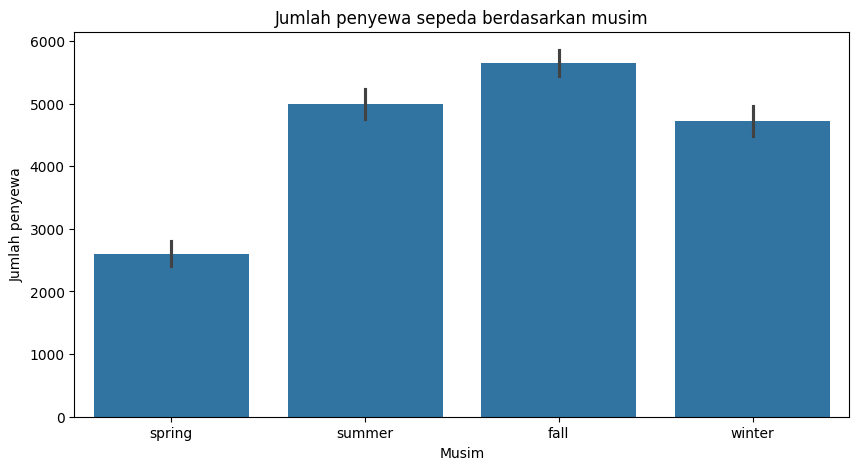

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x= 'season',
    y= 'count',
    data= df_hari
)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah penyewa')
plt.show()

Dari visualisasi data dengan boxplot menunjukkan bahwa terdapat adanya hubungan antara musim dengan jumlah penyewa sepeda. Pada musim fall jumlah penyewa sepeda tertinggi dan pada musim spring

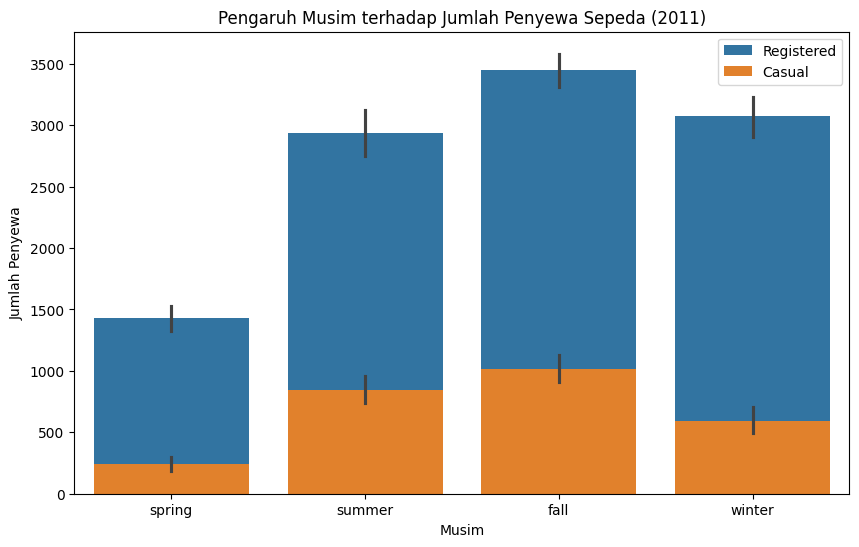

In [67]:
#Mengelompokkan data untuk tahun 2011
df_2011 = df_hari[df_hari['year'] == '2011']

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='registered', data=df_2011, label='Registered')
sns.barplot(x='season', y='casual', data=df_2011, label='Casual')
plt.title('Pengaruh Musim terhadap Jumlah Penyewa Sepeda (2011)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.legend()
plt.show()

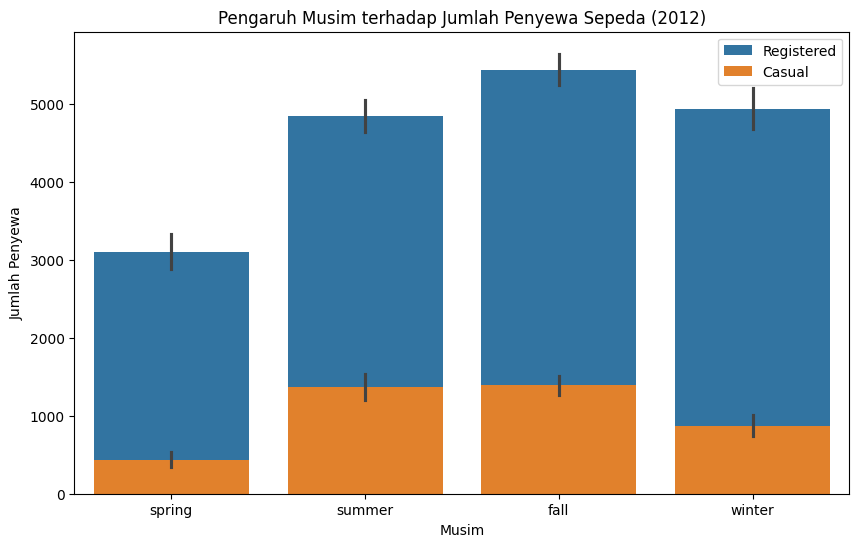

In [68]:
#Mengelompokkan data untuk tahun 2012
df_2012 = df_hari[df_hari['year'] == '2012']

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='registered', data=df_2012, label='Registered')
sns.barplot(x='season', y='casual', data=df_2012, label='Casual')
plt.title('Pengaruh Musim terhadap Jumlah Penyewa Sepeda (2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.legend()
plt.show()

dari visualisasi data pengaruh perubahan musim terhadap perbadingan penyewa yang registered dan casual di tahun 2011 dan 2012, saya menemukan bahwa perubahan musim memiliki dampak yang besar terhadap peningkatan penyewa yang terdaftar.

### Pertanyaan 2: Bagaimana pengaruh kecepatan angin terhadap frekuensi penyewaan sepeda?

In [69]:
df_hari.groupby(['season','year']).agg({
    "windspeed": ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "sum"]
})

windspeed                               count                     \
                  max       min      mean       std   max   min         mean   
season year                                                                    
fall   2011  0.375617  0.081479  0.177308  0.057106  6043  1115  4464.361702   
       2012  0.357587  0.064071  0.166882  0.061716  8714  4073  6824.244681   
spring 2011  0.507463  0.045408  0.214441  0.084067  3239   431  1666.666667   
       2012  0.441563  0.073396  0.214632  0.089189  7836   441  3531.296703   
summer 2011  0.388067  0.074637  0.205778  0.070791  5805   795  3775.173913   
       2012  0.386821  0.065929  0.201237  0.072773  8362  1027  6209.489130   
winter 2011  0.422275  0.022392  0.168132  0.084615  5511   627  3664.460674   
       2012  0.398008  0.046650  0.175857  0.078685  8555    22  5791.865169   

                     
                sum  
season year          
fall   2011  419650  
       2012  641479  
spring 2011  150000  
       2012  321348  
summer 2011  347316  
       2012  571273  
winter 2011  326137  
       2012  515476

In [70]:
print(df_hari['count'].corr(df_hari['windspeed']))

-0.23454499742166993


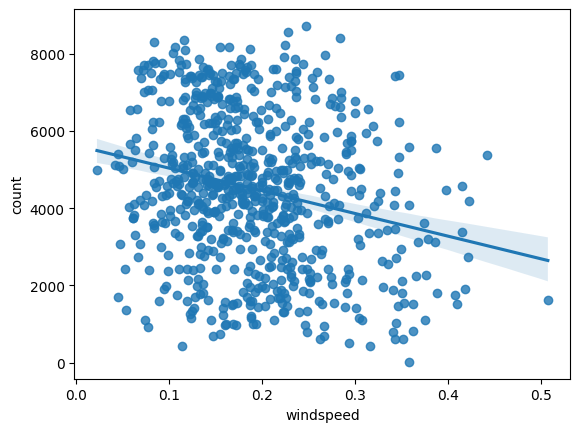

In [71]:
sns.regplot(x='windspeed', y='count', data=df_hari)
plt.show()

Dari korelasi antara kecepatan angin dan jumlah penyewa sepeda didapatkan bahwa terdapat korelasi kecil yang menunjukkan bahwa jumlah penyewa sepeda akan semakin menurun seiring dengan bertambahnya kecepatan angin

### Pertanyaan 3: Bagaimana tren penyewaan sepeda pada musim panas tahun 2011 dan 2012

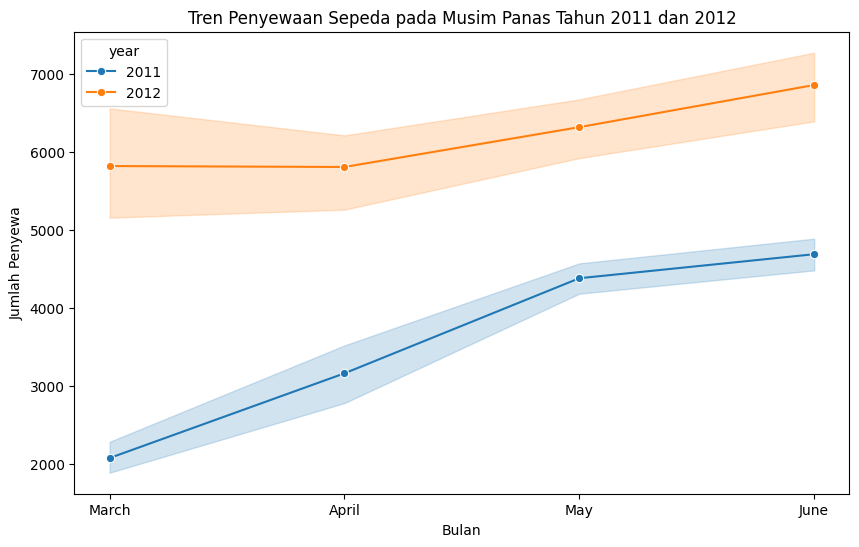

In [72]:
# Filter data for summer months in 2011 and 2012
summer_2011_2012 = df_hari[(df_hari['season'] == 'summer') & ((df_hari['year'] == '2011') | (df_hari['year'] == '2012'))]
#buat plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', hue='year', data=summer_2011_2012, marker='o')
plt.title('Tren Penyewaan Sepeda pada Musim Panas Tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.show()

Tren yang terlihat dari grafik di atas menunjukkan kalau pada musim panas tahun 2011 dan 2012, penyewaan sepeda mengalami peningkatan sampai akhir juni.

###Pertanyaan 4: Bagaimana perbandingan dari musim dengan penyewaan sepeda tertinggi dan terendah? Faktor apa saja yang mempengaruhinya?

In [73]:
# Display data for the spring season
spring_data = df_hari[df_hari['season'] == 'spring']
spring_data.groupby('month').agg({
    "holiday": ["sum"],
    "workingday": ["sum"],
    "temperature": ["max", "min", "mean", "std"],
    "humidity": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

holiday workingday temperature                                \
             sum        sum         max       min      mean       std   
month                                                                   
December       2         13    0.428333  0.215833  0.297951  0.062458   
February       2         39    0.521667  0.127500  0.299226  0.084314   
January        3         40    0.425000  0.059130  0.236444  0.083266   
March          0         28    0.572500  0.198333  0.390549  0.103682   

          humidity                                ...      casual              \
               max       min      mean       std  ...        mean         std   
month                                             ...                           
December  0.858333  0.441250  0.638425  0.119970  ...  293.772727  172.186757   
February  0.929167  0.187917  0.567465  0.145931  ...  262.508772  232.283549   
January   0.911250  0.311250  0.585828  0.150942  ...  194.225806  197.384490   
March     0.948261  0.000000  0.569831  0.173852  ...  678.850000  614.654064   

         registered                                count                     \
                max  min         mean          std   max   min         mean   
month                                                                         
December       3402  432  1660.681818   832.649379  3623   441  1954.454545   
February       4546  905  2392.789474  1091.126003  5062  1005  2655.298246   
January        4185  416  1982.112903  1053.274474  4521   431  2176.338710   
March          5315  491  2872.775000  1447.492872  7836   605  3551.625000   

                       
                  std  
month                  
December   881.284383  
February  1145.313307  
January   1161.674370  
March     1783.064557  

[4 rows x 26 columns]

In [74]:
fall_data = df_hari[df_hari['season'] == 'fall']
fall_data.groupby('month').agg({
    "holiday": ["sum"],
    "workingday": ["sum"],
    "temperature": ["max", "min", "mean", "std"],
    "humidity": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

holiday workingday temperature                                \
              sum        sum         max       min      mean       std   
month                                                                    
August          0         46    0.793333  0.635833  0.708582  0.039913   
July            2         41    0.861667  0.595833  0.755470  0.051950   
June            0         15    0.834167  0.630833  0.727208  0.046638   
September       2         29    0.753333  0.469167  0.624335  0.064866   

           humidity                                ...       casual  \
                max       min      mean       std  ...         mean   
month                                              ...                
August     0.850000  0.415000  0.637730  0.100510  ...  1161.919355   
July       0.865417  0.396250  0.597876  0.103677  ...  1260.596774   
June       0.770417  0.360000  0.544063  0.111371  ...  1188.050000   
September  0.939565  0.501667  0.718313  0.118104  ...  1184.863636   

                      registered                                 count        \
                  std        max   min         mean          std   max   min   
month                                                                          
August     466.576274       6541   889  4502.500000  1335.126601  7865  1115   
July       598.382778       6790  2298  4303.080645  1190.542490  8173  3285   
June       588.245874       6365  3385  4581.350000   883.471459  7458  4507   
September  753.208535       6917  1689  4487.840909  1572.675323  8714  1842   

                                     
                  mean          std  
month                                
August     5664.419355  1494.516146  
July       5563.677419  1273.751871  
June       5769.400000  1001.188315  
September  5672.704545  1826.555184  

[4 rows x 26 columns]

In [75]:
fall_spring_data = df_hari[(df_hari['season'] == 'fall') | (df_hari['season'] == 'spring')]
fall_spring_data.groupby('season').agg({
    "holiday": ["sum"],
    "workingday": ["sum"],
    "temperature": ["max", "min", "mean", "std"],
    "humidity": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
    })

holiday workingday temperature                                humidity  \
           sum        sum         max       min      mean       std       max   
season                                                                          
fall         4        131    0.861667  0.469167  0.706309  0.070848  0.939565   
spring       7        120    0.572500  0.059130  0.297748  0.102735  0.948261   

                                 windspeed                                
         min      mean       std       max       min      mean       std  
season                                                                    
fall    0.36  0.633482  0.119349  0.375617  0.064071  0.172095  0.059526  
spring  0.00  0.582903  0.151880  0.507463  0.045408  0.214537  0.086439

In [76]:
fall_spring_data = df_hari[(df_hari['season'] == 'fall') | (df_hari['season'] == 'spring')]
fall_spring_data.groupby('season').agg({
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

casual                               registered                    \
          max  min         mean         std        max  min         mean   
season                                                                     
fall     3160  118  1202.611702  595.975032       6917  889  4441.691489   
spring   3155    9   334.928177  387.655561       5315  416  2269.204420   

                    count                                  
                std   max   min         mean          std  
season                                                     
fall    1304.626949  8714  1115  5644.303191  1459.800381  
spring  1200.269751  7836   431  2604.132597  1399.942119

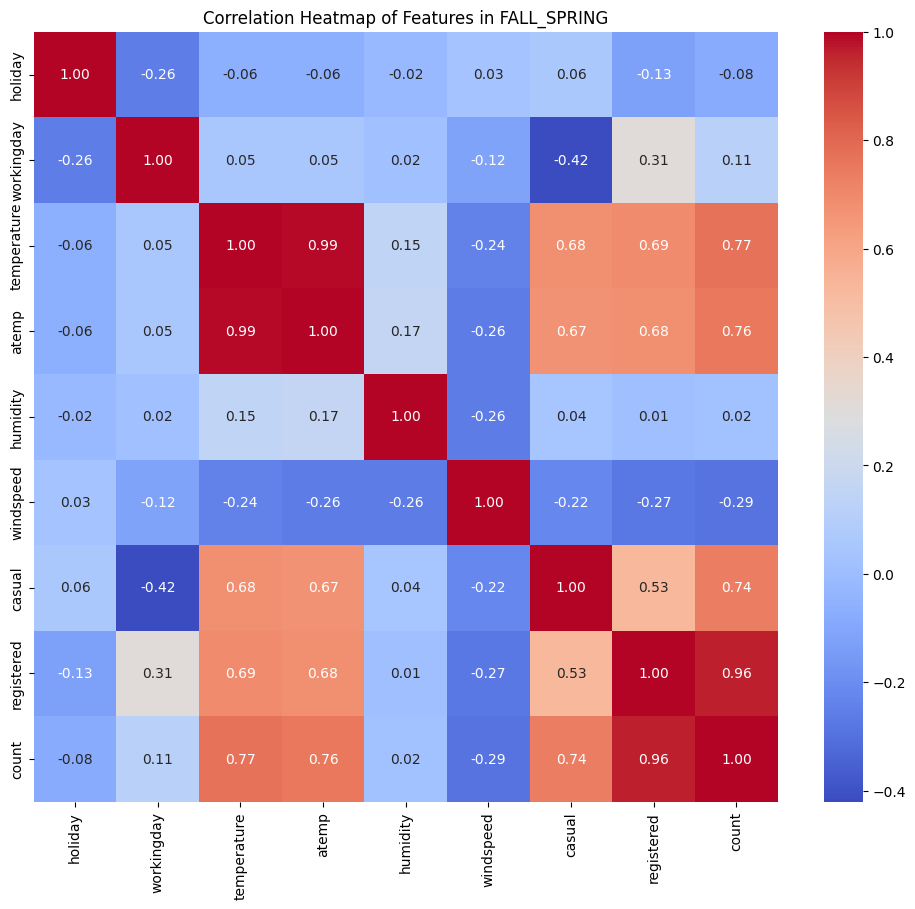

In [77]:
fall_spring_data = df_hari[(df_hari['season'] == 'fall') | (df_hari['season'] == 'spring')]
numerical_features = fall_spring_data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features in FALL_SPRING')
plt.show()

In [78]:
#cek pengaruh antara workingday dengan penyewa sepeda
fall_spring_data = df_hari[(df_hari['season'] == 'fall') | (df_hari['season'] == 'spring')]
fall_spring_data.groupby('season').agg({
    "workingday": ["sum"],
    "casual": ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "count": ["max", "min", "mean", "std"]
})

workingday casual                               registered       \
              sum    max  min         mean         std        max  min   
season                                                                   
fall          131   3160  118  1202.611702  595.975032       6917  889   
spring        120   3155    9   334.928177  387.655561       5315  416   

                                 count                                  
               mean          std   max   min         mean          std  
season                                                                  
fall    4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
spring  2269.204420  1200.269751  7836   431  2604.132597  1399.942119

Saya melanjutkan analisis perbandingan antara musim spring dan fall pada tahun 2011 dan 2012.

1. Bagaimana fall menjadi musim dengan penyewa sepeda tertinggi dan spring menjadi musim dengan penyewa terendah?

2. Faktor apa saja yang mempengaruhinya?

Saya melakukan pengecekan korelasi fitur terhadap jumlah penyewa sepeda pada dua musim tersebut dan diperoleh:

1. Korelasi antara **holiday** dengan jumlah penyewa sepeda (count) sebesar -0.08 menunjukkan bahwa hari libur **tidak** memberikan dampak yang besar terhadap penyewaan sepeda di musim tersebut.

2. Korelasi antara **workingday** dengan jumlah penyewa terdaftar sebesar 0.31 dan korelasi antara workingday dengan jumlah penyewa casual sebesar -0.42. Korelasi ini terhitung cukup besar dan menunjukkan bahwa pada saat workingday penyewa sepeda yang terdaftar jauh lebih banyak dibanding dengan yang casual. Hari kerja **memiliki pengaruh yang cukup** terhadap jumlah penyewa sepeda pada kedua musim tersebut.

3. Korelasi antara **temperature dan atempt** terhadap jumlah penyewa sepeda (count).

  Sebelumnya saya menggabungkan temperature dan atempt dikarenakan keduanya memiliki korelasi yang besar satu sama lain. Korelasi yang dimiliki temperature dan atempt terhadap penyewa sepeda memiliki skor sebesar 0.77 dan 0.76. Hal ini menunjukkan bahwa **temperature dan atempt memiliki korelasi yang besar** terhadap jumlah penyewa sepeda pada kedua musim.

4. Korelasi antara **humidity** terhadap jumlah penyewa sepeda (count) sebesar 0.02. Hal ini menunjukkan bahwa humidity atau kelembapan **tidak** memiliki dampak yang besar terhadap jumlah penyewa sepeda.

5. Korelasi antara **windspeed** terhadap jumlah penyewa sepeda (count) sebesar -0.29. Hal ini menunjukkan bahwa **windspeed memiliki korelasi yang kecil** terhadap jumlah penyewa sepeda. Meskipun begitu, hal ini menunjukkan bahwa semakin rendah windspeed maka semakin banyak pula penyewa sepeda.



**Insight:**
- Dari pertanyaan 1, Saya menemukan bahwa perubahan musim memiliki dampak yang besar terhadap peningkatan penyewa yang terdaftar.
- Dari pertanyaan 2, Saya menemukan bahwa dari korelasi antara kecepatan angin dan jumlah penyewa sepeda didapatkan bahwa terdapat korelasi **kecil** yang menunjukkan bahwa jumlah penyewa sepeda akan semakin menurun seiring dengan bertambahnya kecepatan angin.
- Dari pertanyaan 3, Saya menemukan bahwa pada musim panas tahun 2011 dan 2012 tren penjualan sepeda terus mengalami peningkatan dari awal musim panas(Maret) hingga akhir musim panas(Juni).
- Dari pertanyaan 4, Saya menemukan bahwa faktor terbesar yang mempengaruhi jumlah penyewa sepeda pada musim semi dan musim fall adalah temperature dan atempt.

##Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan dari pertanyaan 1,

  Perubahan musim berpengaruh terhadap jumlah orang yang terdaftar dan casual ke dalam sistem penyewaan sepeda. Pada tahun 2011 dan 2012, musim fall yang menjadi musim dengan penyewa sepeda casual dan registered terbanyak. Sedangkan, musim spring menjadi musim dengan penyewa sepeda casual dan registered terendah pada tahun 2011 dan tahun 2012. Hal ini menunjukkan bahwa penyedia jasa sepeda dapat menyediakan sepeda yang lebih banyak pada tahun selanjutnya di musim fall dan mengurangi pasokan sepeda pada musim spring untuk mengoptimalisasi biaya dan keuntungan yang didapatkan.
- Kesimpulan dari pertanyaan 2,

  Berdasarkan visualisasi data diperoleh bahwa semakin tinggi kecepatan angin maka jumlah penyewa sepeda akan semakin sedikit. Dari persebaran data kecepatan angin terhadap penyewaan sepeda diperoleh bahwa pada kecepatan angin berkisar 0.1 - 0.3 knot menjadi kisaran dimana penyewa sepeda terbanyak terjadi. Hal ini menunjukkan bahwa pada saat kecepatan angin tinggi sebaiknya sepeda yang disediakan untuk disewa dikurangi stoknya untuk menekan biaya perawatan karena tidak banyak penyewa pada saat tersebut. Sedangkan, ketika kecepatan angin rendah maka sepeda yang disediakan diperbanyak.

- Kesimpulan dari pertanyaan 3,

  Summer menjadi musim kedua dengan tingkat penyewaan sepeda terbesar. Tren penyewaan sepeda pada musim panas terus mengalami peningkatan stabil dari awal musim hingga akhir musim. Bagi penyedia jasa penyewaan sepeda dapat meningkat jumlah sepeda yang disediakan pada musim tersebut.

- Kesimpulan dari pertanyaan 4,

  Faktor terbesar yang mempengaruhi jumlah penyewa sepeda pada musim tertinggi dan terendah adalah temperature dan atempt. Korelasi sebesar 0.77 dan 0.76 menunjukkan bahwa temperature pada musim fall lebih banyak disukai oleh orang-orang. Diketahui bahwa temperature pada musim semi mengalami peningkatan secara bertahap setelah musim dingin. Temperature yang mengalami perubahan secara bertahap dari musim dingin ini membuat orang perlu waktu untuk menyesuaikan diri dengan perubahan suhu sehingga penyewaan sepeda pada musim itu tidak terlalu banyak.